In [1]:

import process_gens
import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *



processGens=ProcessGens()
# compare_metric="example_comet"
# process_gen_mode="full_sample"


process_gen_mode="llama_gsm_sample"
compare_metric='final_num_exact_match'


processGens.init_with_mode(process_gen_mode)


root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics = processGens.get_params()

print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
    f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")


/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


Init: process_gens_mode llama_gsm_sample
calculate_gen_summary_dict
path is snellius_copies/helm_output/sample_10_eval_1000/gsm_/meta_llama_Llama_3.1_8B_Instruct/1_beams/runs/sample_10_eval_1000/generation_summary.json
get_metrics_dict


/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using low

	 root_folder: snellius_copies/helm_output 
 	 num_beams_list [1] 
 	 models: ['meta_llama_Llama_3.1_8B_Instruct'] 
 	 custom_metrics['final_num_exact_match']
 	 task_names ['gsm_'] 
 	 suite_name sample_10_eval_1000 
 	 instance_metrics []


In [2]:
instanceGeneration=get_first(processGens.first_run_instances)
print(len(instanceGeneration.examples))

#current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

10


In [3]:

from process_gen_utils import *
print(f"sum(num_beams_list) {sum(num_beams_list)}")
examples_df, completions_df=get_dfs(processGens, num_beams_list)

# for df in examples_df, completions_df:

print(examples_df.head(2))



sum(num_beams_list) 1
Index(['beam_num', 'task_name', 'model', 'example_idx', 'text',
       'completion_length', 'output_logprob', 'instanceID', 'isCompletion',
       'final_num_exact_match'],
      dtype='object')
Num examples: 10000
Num completions: 1000
   beam_num  task_name  model  example_idx  \
0         1          0      0            0   
1         1          0      0            1   

                                                text  completion_length  \
0  Let's analyze the problem step by step:\n\n1. ...                628   
1  It took Finley 30 minutes to cook rice. It too...                375   

   output_logprob instanceID isCompletion  final_num_exact_match  
0      -41.192953     id8131         True               0.248285  
1      -44.047876     id8131         None               0.527523  


In [4]:
print(examples_df[[compare_metric]].mean())

final_num_exact_match    0.406798
dtype: float64


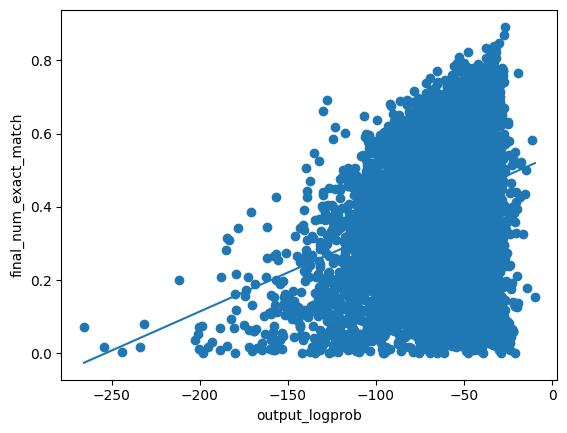

In [5]:
# examples_df
plot_keys(df=examples_df, xlabel='output_logprob', ylabel=compare_metric)

In [6]:
# for col in [compare_metric, 'output_logprob']:
#     examples_df[col + '_norm'] = examples_df.groupby('instanceID')[col].transform(
#         lambda x: (x - x.mean()) / x.std()
# #     )
# print(examples_df)
# plot_keys(df=examples_df, xlabel='output_logprob_norm', ylabel=compare_metric+'_norm')

In [7]:
simple_df=examples_df[["instanceID", "example_idx", compare_metric, "output_logprob"]]
filtered_df=simple_df[simple_df["instanceID"]=="id8131"]
print(filtered_df.head(10))
print(len(examples_df))

  instanceID  example_idx  final_num_exact_match  output_logprob
0     id8131            0               0.248285      -41.192953
1     id8131            1               0.527523      -44.047876
2     id8131            2               0.531217      -47.879491
3     id8131            3               0.426848      -53.065728
4     id8131            4               0.574556      -56.628855
5     id8131            5               0.409116      -57.723745
6     id8131            6               0.518553      -63.388391
7     id8131            7               0.376978      -77.038495
8     id8131            8               0.245547      -82.318511
9     id8131            9               0.446309      -82.365908
10000


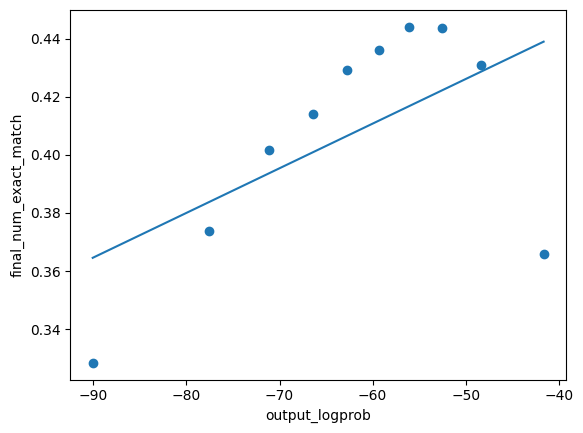

In [8]:


grouped_df = examples_df[["example_idx", compare_metric, "output_logprob"]].groupby('example_idx').mean()

grouped_df.head(2)

plot_keys(grouped_df, "output_logprob", compare_metric)

In [9]:
# print(suite_name)

sample_10_eval_1000
